<a href="https://colab.research.google.com/github/Abhishek-hub-clo/Bag-Pack-Prediction/blob/main/Backpack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv('/content/train.csv')

In [72]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [73]:
df.shape

(300000, 11)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [75]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')

In [76]:
print_unique_col_values(df)

Brand: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]
Material: ['Leather' 'Canvas' 'Nylon' nan 'Polyester']
Size: ['Medium' 'Small' 'Large' nan]
Laptop Compartment: ['Yes' 'No' nan]
Waterproof: ['No' 'Yes' nan]
Style: ['Tote' 'Messenger' nan 'Backpack']
Color: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]


In [77]:
def sm_size(df):
  count=0
  for col in df:
    if col=='Ye':
      count+=1
  print(count)

In [78]:
sm_size(df['Waterproof'])

0


In [79]:
sm_col=['Waterproof']
for col in df[sm_col]:
  df[col]=df[col].replace('Ye','Yes')

In [80]:
fd=pd.read_csv("/content/training_extra.csv")

In [81]:
fd.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [82]:
print_unique_col_values(fd)

Brand: ['Under Armour' 'Puma' 'Jansport' 'Nike' 'Adidas' nan]
Material: ['Canvas' 'Polyester' 'Nylon' 'Leather' nan]
Size: ['Small' 'Large' 'Medium' nan]
Laptop Compartment: ['Yes' 'No' nan]
Waterproof: ['Yes' 'No' nan]
Style: ['Tote' 'Backpack' 'Messenger' nan]
Color: ['Blue' 'Green' 'Red' 'Pink' nan 'Gray' 'Black']


In [83]:
df.isnull().sum()

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [84]:
fd.isnull().sum()

,0
id,0
Brand,117053
Material,102615
Size,81190
Compartments,0
Laptop Compartment,91089
Waterproof,87274
Style,96210
Color,123667
Weight Capacity (kg),1670


In [85]:
fd['Price'].fillna(fd['Price'].mean(),inplace=True)

<ipython-input-85-775cd10acd40>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fd['Price'].fillna(fd['Price'].mean(),inplace=True)


In [86]:
fd['Price']=fd['Price'].fillna(fd['Price'].mean())

In [87]:
fd['Price'].isnull().sum()

0

In [88]:
fde=pd.read_csv("/content/test.csv")

In [89]:
fde.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [90]:
print_unique_col_values(fde)

Brand: ['Puma' 'Nike' 'Adidas' nan 'Under Armour' 'Jansport']
Material: ['Leather' 'Canvas' 'Nylon' 'Polyester' nan]
Size: ['Small' 'Medium' 'Large' nan]
Laptop Compartment: ['No' 'Yes' nan]
Waterproof: ['No' 'Yes' nan]
Style: ['Tote' 'Backpack' 'Messenger' nan]
Color: ['Green' 'Blue' 'Black' 'Red' 'Pink' 'Gray' nan]


In [91]:
fde.isnull().sum()

,0
id,0
Brand,6227
Material,5613
Size,4381
Compartments,0
Laptop Compartment,4962
Waterproof,4811
Style,5153
Color,6785
Weight Capacity (kg),77


In [92]:
def sm_size(fd):
  count=0
  for col in fd:
    if col=='Sm':
      count+=1
  print(count)

In [93]:
sm_size(fde['Size'])

0


In [94]:
sm_col=['Size']
for col in fde[sm_col]:
  fde[col]=fde[col].replace('Sm','Small')

In [95]:
sm_size(fde['Size'])

0


In [96]:
print_unique_col_values(fde)

Brand: ['Puma' 'Nike' 'Adidas' nan 'Under Armour' 'Jansport']
Material: ['Leather' 'Canvas' 'Nylon' 'Polyester' nan]
Size: ['Small' 'Medium' 'Large' nan]
Laptop Compartment: ['No' 'Yes' nan]
Waterproof: ['No' 'Yes' nan]
Style: ['Tote' 'Backpack' 'Messenger' nan]
Color: ['Green' 'Blue' 'Black' 'Red' 'Pink' 'Gray' nan]


In [97]:
fde.shape

(200000, 10)

In [98]:
final_data=pd.concat([df,fd,fde],axis=0)

In [99]:
final_data.shape

(4194318, 11)

In [100]:
print_unique_col_values(final_data)

Brand: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]
Material: ['Leather' 'Canvas' 'Nylon' nan 'Polyester']
Size: ['Medium' 'Small' 'Large' nan]
Laptop Compartment: ['Yes' 'No' nan]
Waterproof: ['No' 'Yes' nan]
Style: ['Tote' 'Messenger' nan 'Backpack']
Color: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]


In [101]:
yes_no_columns=['Laptop Compartment','Waterproof']
for col in yes_no_columns:
  final_data.replace({col:{'Yes':1}},inplace=True)
  final_data.replace({col:{'No':0}},inplace=True)

<ipython-input-101-1a79c72ae968>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data.replace({col:{'No':0}},inplace=True)


In [102]:
final_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312


In [103]:
print_unique_col_values(final_data)

Brand: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]
Material: ['Leather' 'Canvas' 'Nylon' nan 'Polyester']
Size: ['Medium' 'Small' 'Large' nan]
Style: ['Tote' 'Messenger' nan 'Backpack']
Color: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]


In [104]:
final_data.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [105]:
cols=['Brand', 'Material', 'Size',
        'Style', 'Color',]

In [106]:
final_data.isnull().sum()

,0
id,0
Brand,132985
Material,116575
Size,92166
Compartments,0
Laptop Compartment,103495
Waterproof,99135
Style,109333
Color,140402
Weight Capacity (kg),1885


In [107]:
final_data.shape

(4194318, 11)

In [108]:
final_data['Material'].value_counts()

,count
Material,
Polyester,1113909
Leather,1025175
Nylon,990149
Canvas,948510


In [109]:
#final_data['Material'].fillna(method='ffill',inplace=True)

In [110]:
print_unique_col_values(final_data)

Brand: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma' nan]
Material: ['Leather' 'Canvas' 'Nylon' nan 'Polyester']
Size: ['Medium' 'Small' 'Large' nan]
Style: ['Tote' 'Messenger' nan 'Backpack']
Color: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink' nan]


In [111]:
final_data['Material'].value_counts()

,count
Material,
Polyester,1113909
Leather,1025175
Nylon,990149
Canvas,948510


In [112]:
final_data.isnull().sum()

,0
id,0
Brand,132985
Material,116575
Size,92166
Compartments,0
Laptop Compartment,103495
Waterproof,99135
Style,109333
Color,140402
Weight Capacity (kg),1885


In [113]:
final_data['Size'].value_counts()

,count
Size,
Medium,1422262
Large,1377979
Small,1301911


In [114]:
final_data['Laptop Compartment'].value_counts()

,count
Laptop Compartment,
1.0,2071596
0.0,2019227


In [115]:
final_data['Waterproof'].value_counts()

,count
Waterproof,
1.0,2067799
0.0,2027384


In [116]:
cols=['Brand','Style','Size','Color',"Material"]

In [117]:
for col in cols:
  print(f'{col}:{final_data[col].value_counts()}')

Brand:Brand
Under Armour    841174
Adidas          837173
Nike            802680
Puma            793635
Jansport        786671
Name: count, dtype: int64
Style:Style
Messenger    1396064
Tote         1363031
Backpack     1325890
Name: count, dtype: int64
Size:Size
Medium    1422262
Large     1377979
Small     1301911
Name: count, dtype: int64
Color:Color
Pink     723018
Gray     699344
Blue     670497
Red      661616
Black    651603
Green    647838
Name: count, dtype: int64
Material:Material
Polyester    1113909
Leather      1025175
Nylon         990149
Canvas        948510
Name: count, dtype: int64


In [118]:
final_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312


In [119]:
#for col in cols:
 # final_data[col]=final_data[col].fillna(final_data[col].mode()[0],inplace=True)

import numpy as np

# Assuming final_data is already defined
cols=['Brand','Style','Size','Color',"Material","Laptop Compartment","Waterproof"]

for col in cols:
    final_data[col] = final_data[col].fillna(final_data[col].mode()[0])

In [120]:
print_unique_col_values(final_data)

Brand: ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma']
Material: ['Leather' 'Canvas' 'Nylon' 'Polyester']
Size: ['Medium' 'Small' 'Large']
Style: ['Tote' 'Messenger' 'Backpack']
Color: ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink']


In [121]:
final_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,1.0,0.0,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,1.0,1.0,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,1.0,0.0,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,1.0,0.0,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,1.0,1.0,Messenger,Green,17.749338,86.02312


In [122]:
final_data.isnull().sum()

,0
id,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),1885


In [123]:
#final_data['Waterproof']=final_data['Waterproof'].fillna(final_data['Waterproof'].median())

In [124]:
final_data['Weight Capacity (kg)']=final_data['Weight Capacity (kg)'].fillna(final_data['Weight Capacity (kg)'].mean())

In [125]:
final_data.isnull().sum()

,0
id,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0


In [126]:
data_train=final_data.iloc[:3994318,:]
data_test=final_data.iloc[3994318:,:]

In [127]:
data_test.drop("Price",axis=1,inplace=True)

<ipython-input-127-edff121f5908>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop("Price",axis=1,inplace=True)


In [128]:
!pip install category_encoders

In [129]:
import pandas as pd
import category_encoders as ce

In [130]:
# Assuming final_data is already defined, and has a 'Price' column
# Identify your categorical columns and target column
categorical_cols = ['Brand', 'Material', 'Size', 'Style', 'Color']
target_col = 'Price'

# Split the data into training and test data, such that we perform target encoding
# on the training data and transform the test data using that encoding.
data_train=final_data.iloc[:3994318,:]
data_test=final_data.iloc[3994318:,:]

# Split the training data further into training data and validation data
data_train_X=data_train.iloc[:300000,:]
data_X_train=data_train.iloc[300000:,:]

# Separate the training features and the target
y_train=data_train_X[target_col]
X_train=data_train_X.drop(target_col,axis=1)


# Create the TargetEncoder instance
encoder = ce.TargetEncoder(cols=categorical_cols)

# Fit the encoder on the training data
encoder.fit(X_train, y_train)

# Transform the training data
X_train_encoded = encoder.transform(X_train)

# Transform the validation data
y_extra_train=data_X_train[target_col]
X_extra_train=data_X_train.drop(target_col,axis=1)
X_extra_train_encoded = encoder.transform(X_extra_train)

# Transform the test data. Because we fit on X_train, we can use the fitted encoder to
# transform the test set
X_test=data_test.drop('Price',axis=1,errors='ignore')
X_test_encoded=encoder.transform(X_test)


# Concatenate encoded features with original dataframe
X_train_encoded = pd.concat([X_train_encoded,y_train], axis = 1)
X_extra_train_encoded = pd.concat([X_extra_train_encoded,y_extra_train], axis = 1)
X_test_encoded = X_test_encoded

# Display the first 5 rows of the encoded data
print("Encoded training data:")
print(X_train_encoded.head())

print("\nEncoded validation data:")
print(X_extra_train_encoded.head())

print("\nEncoded test data:")
print(X_test_encoded.head())

Encoded training data:
   id      Brand   Material       Size  Compartments  Laptop Compartment  \
0   0  81.791276  80.437883  81.180993           7.0                 1.0   
1   1  81.791276  82.106511  81.424674          10.0                 1.0   
2   2  81.822645  80.437883  81.424674           2.0                 1.0   
3   3  81.319209  81.024760  81.424674           8.0                 1.0   
4   4  80.631060  82.106511  81.180993           1.0                 1.0   

   Waterproof      Style      Color  Weight Capacity (kg)      Price  
0         0.0  81.374865  80.513439             11.611723  112.15875  
1         1.0  81.451328  82.381308             27.078537   68.88056  
2         0.0  81.451328  81.011644             16.643760   39.17320  
3         0.0  81.451328  82.381308             12.937220   80.60793  
4         1.0  81.451328  82.381308             17.749338   86.02312  

Encoded validation data:
       id      Brand   Material       Size  Compartments  Laptop Com

In [131]:
X_extra_train_encoded.describe()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
count,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06,3.694318e+06
mean,2.347158e+06,8.141194e+01,8.141091e+01,8.141120e+01,5.434022e+00,5.185488e-01,5.165776e-01,8.141105e+01,8.141031e+01,1.800883e+01,8.135820e+01
std,1.066458e+06,4.355656e-01,6.901912e-01,1.953227e-01,2.893227e+00,4.996559e-01,4.997252e-01,3.210562e-02,6.455873e-01,6.972964e+00,3.893050e+01
min,5.000000e+05,8.063106e+01,8.043788e+01,8.118099e+01,1.000000e+00,0.000000e+00,0.000000e+00,8.137487e+01,8.051344e+01,5.000000e+00,1.500000e+01
25%,1.423579e+06,8.131921e+01,8.102476e+01,8.118099e+01,3.000000e+00,0.000000e+00,0.000000e+00,8.137487e+01,8.085197e+01,1.206899e+01,4.747778e+01
50%,2.347158e+06,8.144861e+01,8.199577e+01,8.142467e+01,5.000000e+00,1.000000e+00,1.000000e+00,8.140251e+01,8.165354e+01,1.805106e+01,8.098592e+01
75%,3.270738e+06,8.179128e+01,8.199577e+01,8.165145e+01,8.000000e+00,1.000000e+00,1.000000e+00,8.145133e+01,8.200699e+01,2.398335e+01,1.148434e+02
max,4.194317e+06,8.182264e+01,8.210651e+01,8.165145e+01,1.000000e+01,1.000000e+00,1.000000e+00,8.145133e+01,8.238131e+01,3.000000e+01,1.500000e+02


In [132]:
X_train_encoded.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,81.791276,80.437883,81.180993,7.0,1.0,0.0,81.374865,80.513439,11.611723,112.15875
1,1,81.791276,82.106511,81.424674,10.0,1.0,1.0,81.451328,82.381308,27.078537,68.88056
2,2,81.822645,80.437883,81.424674,2.0,1.0,0.0,81.451328,81.011644,16.643760,39.17320
3,3,81.319209,81.024760,81.424674,8.0,1.0,0.0,81.451328,82.381308,12.937220,80.60793
4,4,80.631060,82.106511,81.180993,1.0,1.0,1.0,81.451328,82.381308,17.749338,86.02312


In [133]:
import pandas as pd

In [134]:
final_data=pd.concat([X_train_encoded,X_extra_train_encoded,X_test_encoded],axis=0)

In [135]:
final_data.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,81.791276,80.437883,81.180993,7.0,1.0,0.0,81.374865,80.513439,11.611723,112.15875
1,1,81.791276,82.106511,81.424674,10.0,1.0,1.0,81.451328,82.381308,27.078537,68.88056
2,2,81.822645,80.437883,81.424674,2.0,1.0,0.0,81.451328,81.011644,16.643760,39.17320
3,3,81.319209,81.024760,81.424674,8.0,1.0,0.0,81.451328,82.381308,12.937220,80.60793
4,4,80.631060,82.106511,81.180993,1.0,1.0,1.0,81.451328,82.381308,17.749338,86.02312


                            id     Brand  Material      Size  Compartments  \
id                    1.000000  0.000592  0.000153 -0.000550     -0.000150   
Brand                 0.000592  1.000000 -0.002548  0.002023     -0.001640   
Material              0.000153 -0.002548  1.000000  0.000783      0.003239   
Size                 -0.000550  0.002023  0.000783  1.000000      0.004075   
Compartments         -0.000150 -0.001640  0.003239  0.004075      1.000000   
Laptop Compartment    0.000274 -0.000270 -0.000119 -0.000918     -0.003334   
Waterproof           -0.000650 -0.000503 -0.000642 -0.000468     -0.002378   
Style                -0.000873 -0.000193  0.002916 -0.000326     -0.000838   
Color                -0.000418 -0.000843  0.003304 -0.000089     -0.000745   
Weight Capacity (kg) -0.000358 -0.002378 -0.004325 -0.004035      0.001004   
Price                -0.000670  0.012563  0.015286  0.006120     -0.000691   
Weight_Capacity_sq   -0.000045  0.007304  0.003121  0.001983    

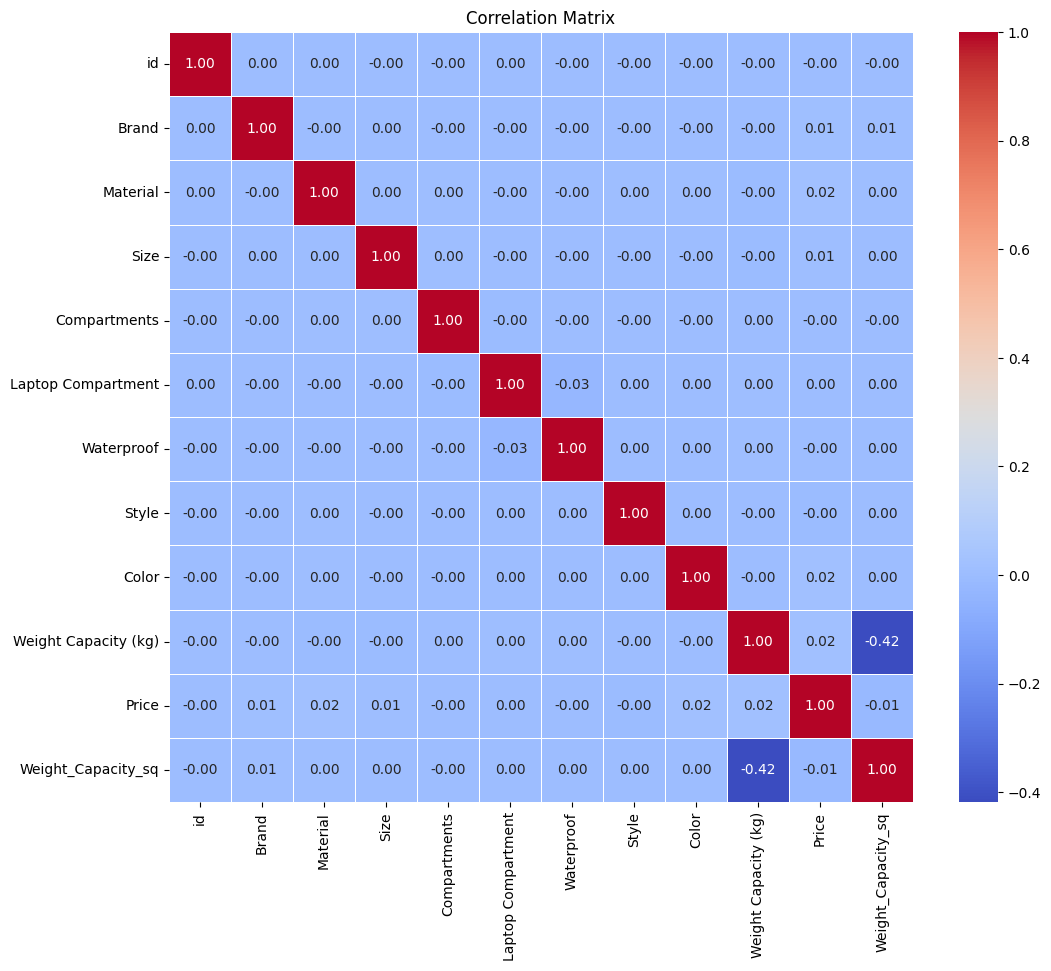

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the correlation matrix
correlation_matrix = final_data.corr()

# Print the correlation matrix
print(correlation_matrix)


# Optional: Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [138]:
final_data.drop("id", axis=1, errors='ignore',inplace=True)

In [139]:
final_data.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,Weight_Capacity_sq
0,81.791276,80.437883,81.180993,7.0,5.199338,-5.199338,81.374865,80.513439,-0.751742,112.15875,0.565116
1,81.791276,82.106511,81.424674,10.0,5.199338,5.199338,81.451328,82.381308,1.198576,68.88056,1.436584
2,81.822645,80.437883,81.424674,2.0,5.199338,-5.199338,81.451328,81.011644,-0.162033,39.17320,0.026255
3,81.319209,81.024760,81.424674,8.0,5.199338,-5.199338,81.451328,82.381308,-0.552945,80.60793,0.305748
4,80.631060,82.106511,81.180993,1.0,5.199338,5.199338,81.451328,82.381308,-0.038282,86.02312,0.001466


In [140]:
data_train=final_data.iloc[:3994318,:]
data_test=final_data.iloc[3994318:,:]

In [141]:
data_train_X=data_train.iloc[:300000,:]
data_X_train=data_train.iloc[300000:,:]

In [142]:
y_train=data_train_X['Price']
X_train=data_train_X.drop('Price',axis=1)

In [143]:
y_extra_train=data_X_train['Price']
X_extra_train=data_X_train.drop('Price',axis=1)

In [144]:
X_test=data_test.drop('Price',axis=1)

In [145]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model, X_train, y_train, cv=10, scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [38.89587817 38.84562233 38.96315434 39.1694005  38.97935593 38.9519193
 38.93338    39.28162994 39.04061495 39.11954211]
Average RMSE: 39.01804975765813


In [147]:
from xgboost import XGBRegressor
model1=XGBRegressor()

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model1, X_train, y_train, cv=10, scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [39.03312577 38.96850045 39.12905425 39.31037065 39.15537764 39.09850232
 39.09416369 39.4509211  39.20769445 39.29041668]
Average RMSE: 39.173812700301724


In [149]:
X_extra_train_encoded.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,81.822645,82.106511,81.424674,10.0,1.0,1.0,81.374865,82.006994,23.882052,114.11068
1,500001,81.448607,81.995773,81.424674,4.0,0.0,1.0,81.402513,82.381308,11.869095,129.74972
2,500002,81.791276,81.995773,81.424674,8.0,1.0,1.0,81.374865,81.011644,8.092302,21.37370
3,500003,81.319209,81.024760,81.651446,7.0,0.0,0.0,81.451328,81.653538,7.719581,48.09209
4,500004,81.319209,80.437883,81.651446,9.0,0.0,1.0,81.374865,82.381308,22.741826,77.32461


In [150]:
y_extra_train=X_extra_train_encoded['Price']
X_extra_train_encoded=X_extra_train_encoded.drop('Price',axis=1)

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [38.87120109 39.06701611 38.96577689 39.10803049 39.07900384]
Average RMSE: 39.01820568455008


In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model1, X_train_encoded, y_train, cv=5, scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [0.16010651 0.15899638 0.15864898 0.15843916 0.1634563 ]
Average RMSE: 0.15992946793210225


In [153]:
X_train.columns = X_train.columns.astype(str)
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [154]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model, X_train, y_train, cv=10, scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [38.89587817 38.84562233 38.96315434 39.1694005  38.97935593 38.9519193
 38.93338    39.28162994 39.04061495 39.11954211]
Average RMSE: 39.01804975765813


In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
y_extra_train=data_X_train['Price']
X_extra_train=data_X_train.drop('Price',axis=1)


In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model, X_extra_train, y_extra_train, cv=10, scoring="neg_mean_squared_error"
)
rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [38.92187057 38.87457277 38.92790277 38.90387971 38.88628255 38.95299609
 38.90975268 38.88657024 38.93818322 38.89117042]
Average RMSE: 38.909318100308056


In [158]:
print(y_extra_train)

0          114.11068
1          129.74972
2           21.37370
3           48.09209
4           77.32461
             ...    
3694313    104.74460
3694314    122.39043
3694315    148.18470
3694316     22.32269
3694317    107.61199
Name: Price, Length: 3694318, dtype: float64


In [159]:
model.fit(X_train,y_train)

LinearRegression()

In [160]:
model.fit(X_extra_train,y_extra_train)

LinearRegression()

In [161]:
X_extra_train.isnull().sum()

,0
Brand,0
Material,0
Size,0
Compartments,0
Laptop Compartment,0
Waterproof,0
Style,0
Color,0
Weight Capacity (kg),0
Weight_Capacity_sq,0


In [162]:
from xgboost import XGBRegressor
model1 = XGBRegressor()

In [ ]:
## Assuming X_train and y_train are your training data
#model.fit(X_train, y_train)  # Fit the model to your training data

# Now you can make predictions
#y_pred = model.predict(data_test)

In [ ]:
#y_pred=model.predict(data_test)

In [163]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
baseline_score = cross_val_score(
    model1, X_extra_train, y_extra_train, cv=10, scoring="neg_mean_squared_error"
)
rmse_scores = np.sqrt(-baseline_score)
print("RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

RMSE scores: [38.90224395 38.85419461 38.90935238 38.88262643 38.86877624 38.94068941
 38.89157726 38.86638992 38.91998333 38.87112386]
Average RMSE: 38.89069573910312


In [164]:
model1.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [165]:
y_pred=model1.predict(X_test)

In [166]:
y_pred_series = pd.Series(y_pred)
missing_predictions = y_pred_series.isnull().sum()
print("Number of missing predictions:", missing_predictions)

Number of missing predictions: 0


In [167]:
y_pred_series.shape

(200000,)

In [168]:
sub_df=pd.read_csv('/content/sample_submission.csv')

In [169]:
sub_df.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


In [170]:
sub_df.shape

(200000, 2)

In [171]:
y_peds=pd.DataFrame(y_pred,columns=['Price'])
sub_df=pd.read_csv('/content/sample_submission.csv')
sub_df.drop(['Price'],axis=1,inplace=True)
datasets=pd.concat([sub_df['id'],y_peds],axis=1)
datasets.to_csv('sample_submission.csv',index=False)

In [172]:
dfe=pd.read_csv('/content/sample_submission.csv')

In [173]:
dfe.head()

,id,Price
0,300000,82.737200
1,300001,80.442825
2,300002,83.513380
3,300003,81.347640
4,300004,76.150040


In [174]:
dfe.tail()

,id,Price
199995,499995,80.540550
199996,499996,85.295550
199997,499997,83.083305
199998,499998,84.955150
199999,499999,78.293890


In [175]:
dfe.shape

(200000, 2)

In [176]:
dfe.isnull().sum()

,0
id,0
Price,0
